## 線形モデル

In [1]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

w[0]: 0.393906  b: -0.031804


### 線形回帰 特徴量1つ

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

 - coef_ : 傾き
 - intercept_ : 切片

In [3]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [4]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


### 特徴量が複数

In [5]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


### リッジ回帰

正則化(傾きを緩やかにする)として重みwの平方和を加える

In [7]:
from sklearn.linear_model import Ridge

ridgh = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridgh.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridgh.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


#### alpha値で汎化性能を上げる or 訓練予測を上げるかの調整ができる

In [8]:
ridgh10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridgh10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridgh10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [9]:
ridgh01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridgh01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridgh01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


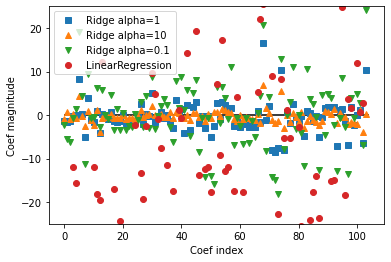

In [10]:
import matplotlib.pyplot as plt
plt.plot(ridgh.coef_, 's', label="Ridge alpha=1")
plt.plot(ridgh10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridgh01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coef index")
plt.ylabel("Coef magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

上の表は104個の説明変数に対してのウエイトの分布を表している。上下の開きが大きいほど傾きが大きいフィットとなる

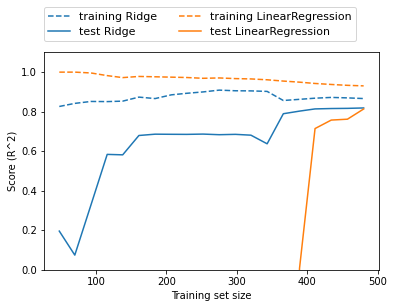

In [11]:
mglearn.plots.plot_ridge_n_samples()

### ラッソ回帰

ラッソは自動的に特徴量を削減して計算する

In [12]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
# 使用した特徴量の数
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


上記、学習データでのスコアが非常に低い。適合不足と読み取れる。alphaを下げると汎化性能を下げることができる

In [13]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


alphaを下げると線形回帰に近づいていく

In [14]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coef magnitude')

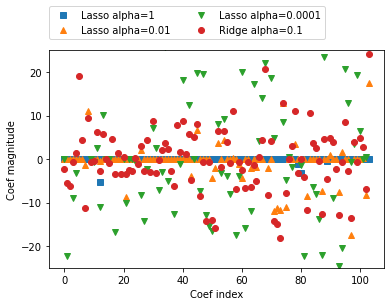

In [15]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridgh01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coef index")
plt.ylabel("Coef magnitude")


alphaを下げていくことによって正則化が緩んでいくのがわかる

#### 2.3.3.5 クラス分類のための線形モデル

ロジスティック回帰(回帰と名がつくが分類アルゴリズム)とサポートベクタマシンの境界の可視化

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


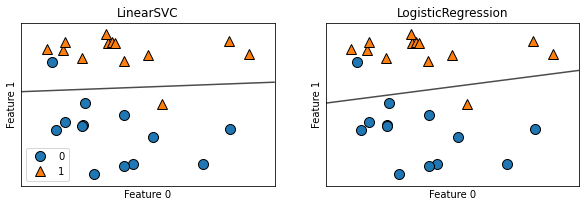

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
# 1行2列のサブキャンパスの生成
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
# zipは配列結合
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    # 分類モデルと特徴量を渡すと境界線を可視化するメソッド
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    # Xはnumpy discrete_scatter(x座標, y座標, 点のマーク, 描画オブジェクト)
    mglearn.discrete_scatter(X[:,0], X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

サポートベクタマシンの正則化係数 Cで調整

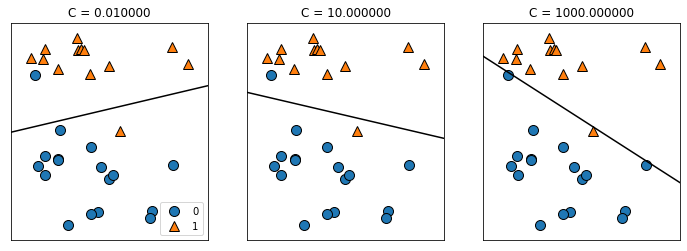

In [17]:
mglearn.plots.plot_linear_svc_regularization()

ロジスティック回帰での多数の特徴量を持つデータの分類

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(len(cancer.data[0]))

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


30
Training set score: 0.953
Test set score: 0.958


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


かなり良いスコアだが、学習データとテストデータでのスコアが近いので適合不足の可能性がある。少し正則化を緩める。

In [19]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


逆に正則化を強めるとスコアが落ちる

In [20]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


学習したパラメータの可視化

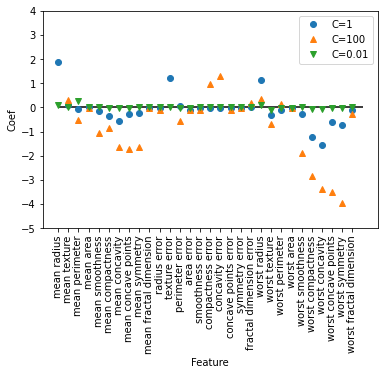

In [21]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
# 横軸の目盛り体裁。「どの位置」に「何を」表示するか
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
# y軸指定の高さに線を引く。この場合は0の高さ
plt.hlines(0, 0, cancer.data.shape[1])
# y軸のレンジ
plt.ylim(-5, 4)
plt.xlabel("Feature")
plt.ylabel("Coef")
#凡例を表示
plt.legend()

ロジスティック回帰でのL1正則化。特徴量を削減して分類

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


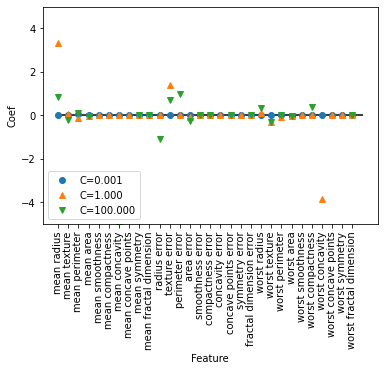

In [22]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coef")
plt.ylim(-5, 5)
plt.legend(loc=3)

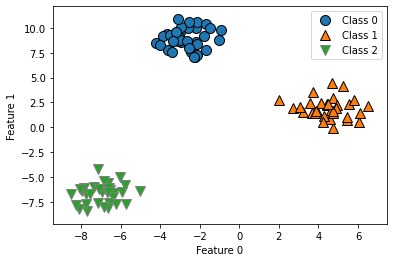

In [23]:
import pandas as pd
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

SVmでの分類

In [24]:
liner_svm = LinearSVC().fit(X, y)
print("Coef: ", liner_svm.coef_.shape)
print("Intercept shape: ", liner_svm.intercept_.shape)

Coef:  (3, 2)
Intercept shape:  (3,)


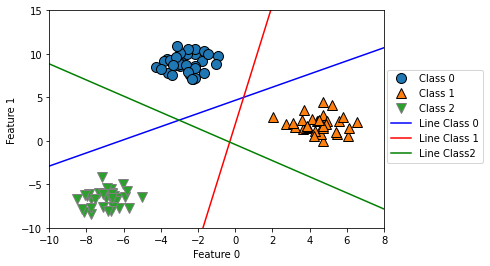

In [25]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(liner_svm.coef_,liner_svm.intercept_, ["b", "r", "g"]):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line Class 0", "Line Class 1", "Line Class2"], loc=(1.01, 0.3))

2線間の分類区分を表示

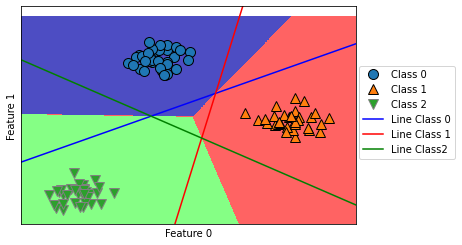

In [26]:
# 領域の表示
mglearn.plots.plot_2d_classification(liner_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(liner_svm.coef_,liner_svm.intercept_, ["b", "r", "g"]):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line Class 0", "Line Class 1", "Line Class2"], loc=(1.01, 0.3))